# 1. Machine Learning with Scikit-Learn

Problem: A classification survival and deceased based on [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
Before going further, what do you think is the most important reasons passangers survived the Titanic sinking?
[Description from Kaggle](https://www.kaggle.com/c/titanic/overview/description)

# 2. Data Understanding 


## Import Libraries

In [1]:

import math, time, random, datetime

# Handle table-like data and matrices
import pandas as pd
import numpy as np

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Modelling Helpers


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab

# Configure visualisations
%matplotlib inline
sns.set_style( 'whitegrid' )

# Import data

import training data

In [2]:
# get train & test data as a DataFrame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
test.head()

In [ ]:
# Take a look into 5 rows of a data set
train.head()

Check the data type of each column

In [ ]:
train.dtypes

Show a quick statistic summary of your data

In [ ]:
train.describe(include='all')

In [ ]:
train.isnull().sum()

From Daniel Bourke
https://www.youtube.com/watch?v=f1y9wDDxWnA

In [3]:
#From Daniel Bourke

def find_missing_value(df,columns):
    """
    Find number of rows where certain columns are missing value.
    ::praram_df: = target datafram
    ::param_columns:= list of columns
    """
    missing_value ={}
    print("Number of missing or NaN value for each column")
    df_length = len(df)
    for column in columns:
        total_column_value = df[column].value_counts().sum()
        missing_value[column] = df_length - total_column_value
    return missing_value

missing_value = find_missing_value(train,columns = train.columns)
missing_value

Number of missing or NaN value for each column


{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [ ]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables 

# Visualizing Data

###  Target Feature: Survived
Description: Whether the passenger survived or not.

key: 0 = did not survive, 1 = survived

This is the variable we want our machine learning model to predict based off all the others

In [ ]:
fig = plt.figure(figsize=(20,4))
sns.countplot(y ='Survived', data = train)
print(train.Survived.value_counts())
print(train[train['Survived']== 0].Survived.count()/train.Survived.count())
print(train[train['Survived']== 1].Survived.count()/train.Survived.count())

In [ ]:
train.groupby('Sex').Survived.mean()

In [ ]:
# Adding data to subset dataframes
df_bin["Survived"] = train["Survived"]
df_con["Survived"] = train['Survived']

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Survived',data=train,palette='RdBu_r')

### Feature: Pclass

Description: The ticket class of the passenger
Key: 1 = 1st, 2 = 2st, 3 = 3rd

In [ ]:
sns.distplot(train.Pclass)

In [ ]:
# Adding data to subset dataframes
df_bin["Pclass"] = train["Pclass"]
df_con["Pclass"] = train['Pclass']

In [ ]:
len(df_con)

### Feature: Name
The name of passenger

In [ ]:
train.Name.value_counts()

In [ ]:
train.Name.apply(lambda x: x.split(" ")[1])

In [ ]:
train['NamePrefix']=train.Name.str.split(" ").str.get(1)

In [4]:
def format_name(df):
    """ 
    The function will manipulate the name column
    Paramteres
    df: dataframe test or train
    return:dataframe with additional column 'NamePrefix' 
    """

    df['NamePrefix']=df.Name.str.split(" ").str.get(1)
    return df

In [ ]:
train.columns

In [ ]:
train.groupby(train.Name.str.split(" ").str.get(1)).Sex.count()

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Survived',hue="Sex",data=train,palette='RdBu_r')

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Survived", y="PassengerId", data=train,palette='rainbow')

In [ ]:
plt.figure(figsize=(12, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [ ]:
plt.figure(figsize=(12, 7))
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

In [ ]:
train.groupby(['Sex'])['Survived'].agg(['mean','count','sum']).head()

In [ ]:
train.pivot_table(index='Sex',columns='Age',values='Survived',aggfunc='mean',margins=True)

In [ ]:
train.pivot_table(index='Sex',columns='Pclass',values='Survived',aggfunc='count',margins=True)

# Cleanup the Data 
Check missing data 

In [ ]:
plt.figure(figsize=(12, 7))
train.isnull().sum().plot.bar()

In [ ]:
train.groupby(['Pclass']).Age.mean()

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [5]:
#from https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/

def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [6]:

test.dtypes
#test.Fare.isnull().sum()

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.fillna(test.Fare.median())
test.Fare.isnull().sum()

1

In [11]:
def simplify_ages(df):
    df['Age'] = df[['Age','Pclass']].apply(inpute_age,axis=1)
    #From Data school https://www.youtube.com/watch?v=RlIiVeig3hc&t=781s
    df['Age'] = pd.cut(df['Age'],bins=[0,18,25,99],labels=['child','young adults','adults'])
    df['Age Cat End'] = df['Age'].map({'child':0,'young adults':1,'adults':2})
    return df

def simplify_fare(df):
    if df['Fare'].isnull().sum()!=0:
        df.fillna(value=df['Fare'].median(),inplace =True)
    else:
        pass
    return df

def format_name(df):
    """ 
    The function will manipulate the name column
    Paramteres
    df: dataframe test or train
    return:dataframe with additional column 'NamePrefix' 
    """

    df['NamePrefix']=df.Name.str.split(" ").str.get(1)
    return df

# Converting Categorical Features


In [8]:
# create a function

def simplify_sex(df):
    sex = pd.get_dummies(df['Sex'],drop_first=True)
    # df['Sex'] = train.sex.map({'female':0, 'men':1})
    df['sex'] = sex
    
    
def simplify_embark(df):
    embark = pd.get_dummies(df['Embarked'],drop_first=True)
    df = pd.concat([df,embark],axis=1)
    return df



In [9]:
def drop_features(df):
    df.drop(['Sex','Embarked','Name','Ticket','Cabin','Age'],axis=1,inplace=True)
    return df


In [12]:
def transform_features(df):
    """
    From https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish
    """
    simplify_fare(df)
    format_name(df)
    simplify_ages(df)
    
    simplify_sex(df)
    simplify_embark(df)
    drop_features(df)
    return df
    
train = transform_features(train)
test = transform_features(test)
    
    
train.info
print("\n")
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
NamePrefix     418 non-null object
Age Cat End    418 non-null category
sex            418 non-null uint8
dtypes: category(1), float64(1), int64(4), object(1), uint8(1)
memory usage: 20.6+ KB


In [13]:




from sklearn import preprocessing

def encode_features(df_train,df_test):

    features = ['Fare', 'NamePrefix','Age Cat End']
    #features = ['Age Cat End']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train,df_test

train, test = encode_features(train,test)

train.head()



,PassengerId,Survived,Pclass,SibSp,Parch,Fare,NamePrefix,Age Cat End,sex
0,1,0,3,1,0,20,19,1,1
1,2,1,1,1,0,237,20,2,0
2,3,1,3,0,0,50,16,2,0
3,4,1,1,1,0,217,20,2,0
4,5,0,3,0,0,52,19,2,1


In [14]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Fare,NamePrefix,Age Cat End,sex
0,892,3,0,0,43,19,2,1
1,893,3,1,0,12,20,2,0
2,894,2,0,0,77,19,2,1
3,895,3,0,0,63,19,2,1
4,896,3,1,1,93,20,1,0


# Building a Logistic Regression model

## Splitting up the Training Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived','PassengerId'],axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 331 to 829
Data columns (total 7 columns):
Pclass         268 non-null int64
SibSp          268 non-null int64
Parch          268 non-null int64
Fare           268 non-null int64
NamePrefix     268 non-null int32
Age Cat End    268 non-null int64
sex            268 non-null uint8
dtypes: int32(1), int64(5), uint8(1)
memory usage: 13.9 KB


## Training and Predicting

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\MiniConda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predictions = logmodel.predict(X_test)
print(predictions, len(predictions))
print(len(X_test))

[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1] 268
268


## Evaluation

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Classification report

In [22]:
print(classification_report(y_test,predictions))
print(cross_val_score(logmodel,X_test,y_test,cv=10,scoring='accuracy').mean())

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       154
           1       0.76      0.64      0.70       114

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

0.7532967032967033


C:\MiniConda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\MiniConda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\MiniConda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\MiniConda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\MiniConda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

### Confusion matrix

In [23]:
confusion = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[131  23]
 [ 41  73]]


In [24]:
confusion = confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[131  23]
 [ 41  73]]


In [25]:
#Classification Accuracy
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test,predictions))

0.7611940298507462
0.7611940298507462


In [26]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?

print(TP / float(TP + FN))
print(metrics.recall_score(y_test,predictions))

0.6403508771929824
0.6403508771929824


In [27]:
#Specificity: When the actual value is negative, how often is the prediction correct?
print(TN / float(TN + FP))

0.8506493506493507


In [28]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
print(FP / float(TN + FP))

0.14935064935064934


In [29]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(metrics.precision_score(y_test,predictions))

0.7604166666666666
0.7604166666666666


# Building a a K-nearest neighbors model¶

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=(5))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))



0.6977611940298507
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       154
           1       0.70      0.51      0.59       114

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.70      0.70      0.69       268



In [31]:
#from https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with k=5 for KNN (the n_neighbors parameters)



knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)



[0.74603175 0.68253968 0.77777778 0.76190476 0.74603175 0.77419355
 0.77419355 0.80645161 0.75409836 0.83606557]


In [32]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7434787170641216, 0.7450122971804621, 0.7675954605357037, 0.7433448330857109, 0.7659288358389362, 0.7417310904619209, 0.7594243408627332, 0.744880091998019, 0.7416542855464061, 0.7304126480488194, 0.733821862959885, 0.7271604005607178, 0.7240651204955806, 0.7192511730586824, 0.7065279981197484, 0.7016364063693519, 0.6872994888066278, 0.6824078970562313, 0.6872226838911133, 0.6807941544324411, 0.6888611887554247, 0.6873515314816214, 0.6921910805570245, 0.70010030805906, 0.6953904459721488, 0.7033261145106731, 0.703326114510673, 0.7097273635348729, 0.7066312440717517, 0.711341106158663]


Text(0, 0.5, 'Cross-Validated Accuracy')

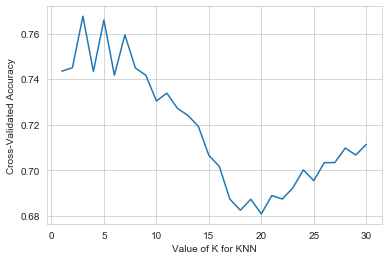

In [33]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
ids = test['PassengerId']
predictions = logmodel.predict(test)
#print(ids,predictions)
#print("ids ",len(ids)," ","predictions ",len(predictions))



output = pd.DataFrame({ 'PassengerId': ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

C:\MiniConda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7649253731343284


In [31]:
train.head()

,Survived,Pclass,SibSp,Parch,Fare,NamePrefix,Age Cat End,sex
0,0,3,1,0,20,19,1,1
1,1,1,1,0,237,20,2,0
2,1,3,0,0,50,16,2,0
3,1,1,1,0,217,20,2,0
4,0,3,0,0,52,19,2,1


In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score

Xall = train.drop(['Survived'],axis=1)
yall = train['Survived']




def run_kfold(clf): 
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for trainindex, testindex in kf.split(Xall, yall):
        fold += 1
        Xtrain, Xtest = Xall.values[trainindex], Xall.values[testindex]
        ytrain, ytest = yall.values[trainindex], yall.values[testindex]
        clf.fit(Xtrain, ytrain)
        predictions = clf.predict(Xtest) 
        accuracy = accuracy_score(ytest, predictions) 
        outcomes.append(accuracy) 
        print('Fold {0} accuracy: {1}'.format(fold, accuracy)) 
    mean_outcome = np.mean(outcomes)
    print("Mean Acurracy: {0}".format(mean_outcome))

run_kfold(clf)

Fold 1 accuracy: 0.7888888888888889
Fold 2 accuracy: 0.7528089887640449
Fold 3 accuracy: 0.7752808988764045
Fold 4 accuracy: 0.8089887640449438
Fold 5 accuracy: 0.8202247191011236
Fold 6 accuracy: 0.7528089887640449
Fold 7 accuracy: 0.7640449438202247
Fold 8 accuracy: 0.7191011235955056
Fold 9 accuracy: 0.8202247191011236
Fold 10 accuracy: 0.8202247191011236
Mean Acurracy: 0.7822596754057427


In [39]:
test.head()

,PassengerId,Pclass,SibSp,Parch,Fare,NamePrefix,Age Cat End,sex
0,892,3,0,0,43,19,2,1
1,893,3,1,0,12,20,2,0
2,894,2,0,0,77,19,2,1
3,895,3,0,0,63,19,2,1
4,896,3,1,1,93,20,1,0


In [40]:
ids = test['PassengerId']
predictions = clf.predict(test)
#print(ids,predictions)
#print("ids ",len(ids)," ","predictions ",len(predictions))



output = pd.DataFrame({ 'PassengerId': ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
len(test)

418